<a href="https://colab.research.google.com/github/ravi-0309/Dynamic-Response/blob/main/Response_Spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

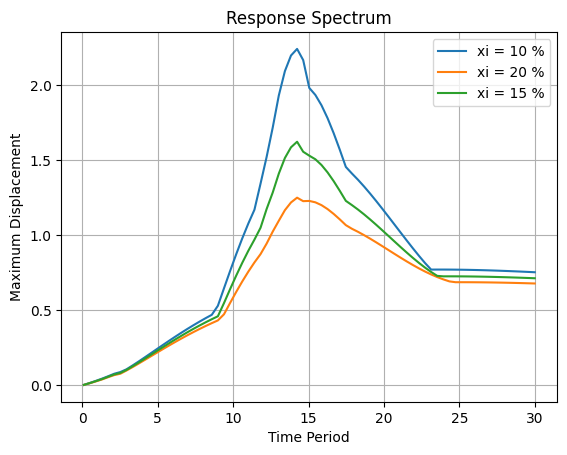

In [ ]:
# RESPONSE SPECTRUM

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def max_displacement(T, xi):
  # Input Parameters
  m = 5.0
  k = 1.0
  c = xi * 2 * np.sqrt(m*k)

  # Time Values
  dt = 0.01
  time = np.arange(0, 50, dt)

  # Matrices and Arrays
  A = np.array([[m, 0], [0, 1]])
  A_inv = inv(A)
  B = np.array([[c, k], [-1, 0]])

  # Empty Arrays
  positions = []
  velocities = []

  # Forcing Function
  F_0 = 0.5
  def F(t):
    return np.array([F_0 * np.sin(2*np.pi*t/T), 0.0])

  # Initial Conditions
  x_i = 0.0
  x_i_d = 0.0

  force = []
  for t in time:
    f = F(t)[0]
    force.append(f)

  # Slope Function
  def G(y, t):
    return A_inv.dot(F(t) - B.dot(y))

  # RK4 Function
  def RK4(y, t):
    k1 = G(y, t)
    k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
    k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
    k4 = G(y + k3*dt, t + dt)
    return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0

  y_i = np.array([x_i_d, x_i])
  for t in time:
    positions.append(y_i[1])
    velocities.append(y_i[0])
    y_i = y_i + RK4(y_i, t)

  max_displacement = max(positions)
  return max_displacement

max_disp_xi_0_1 = []
max_disp_xi_0_2 = []
max_disp_xi_0_15 = []
Time_Periods = np.linspace(0.1, 30, 75)

for T in Time_Periods:
  max_disp_xi_0_1.append(max_displacement(T, 0.1))
  max_disp_xi_0_2.append(max_displacement(T, 0.2))
  max_disp_xi_0_15.append(max_displacement(T, 0.15))

plt.plot(Time_Periods, max_disp_xi_0_1, label = 'xi = 10 %')
plt.plot(Time_Periods, max_disp_xi_0_2, label = 'xi = 20 %')
plt.plot(Time_Periods, max_disp_xi_0_15, label = 'xi = 15 %')
plt.xlabel('Time Period')
plt.ylabel('Maximum Displacement')
plt.title('Response Spectrum')
plt.legend()
plt.grid(True)
plt.show()


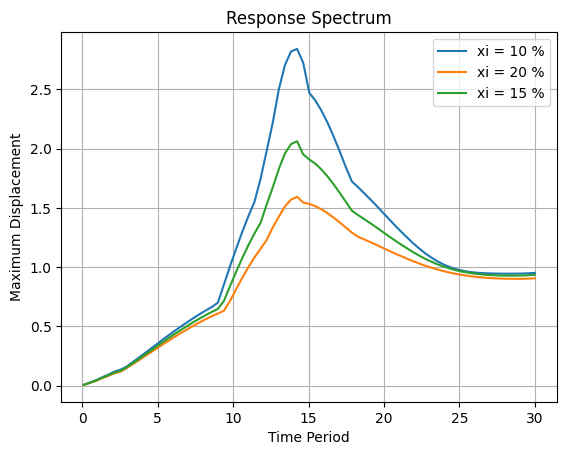

In [1]:
# RESPONSE SPECTRUM

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def max_displacement(T, xi):
  # Input Parameters
  m = 5.0
  k = 1.0
  c = xi * 2 * np.sqrt(m*k)

  # Time Values
  dt = 0.01
  time = np.arange(0, 50, dt)

  # Matrices and Arrays
  A = np.array([[m, 0], [0, 1]])
  A_inv = inv(A)
  B = np.array([[c, k], [-1, 0]])

  # Empty Arrays
  positions = []
  velocities = []

  # Forcing Function
  F_0 = 0.5
  def F(t):
    if (t // (T/2.0)) % 2 == 0:
      return np.array([F_0, 0])
    else:
      return np.array([-F_0, 0])

  # Initial Conditions
  x_i = 0.0
  x_i_d = 0.0

  force = []
  for t in time:
    f = F(t)[0]
    force.append(f)

  # Slope Function
  def G(y, t):
    return A_inv.dot(F(t) - B.dot(y))

  # RK4 Function
  def RK4(y, t):
    k1 = G(y, t)
    k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
    k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
    k4 = G(y + k3*dt, t + dt)
    return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0

  y_i = np.array([x_i_d, x_i])
  for t in time:
    positions.append(y_i[1])
    velocities.append(y_i[0])
    y_i = y_i + RK4(y_i, t)

  max_displacement = max(positions)
  return max_displacement

max_disp_xi_0_1 = []
max_disp_xi_0_2 = []
max_disp_xi_0_15 = []
Time_Periods = np.linspace(0.1, 30, 75)

for T in Time_Periods:
  max_disp_xi_0_1.append(max_displacement(T, 0.1))
  max_disp_xi_0_2.append(max_displacement(T, 0.2))
  max_disp_xi_0_15.append(max_displacement(T, 0.15))

plt.plot(Time_Periods, max_disp_xi_0_1, label = 'xi = 10 %')
plt.plot(Time_Periods, max_disp_xi_0_2, label = 'xi = 20 %')
plt.plot(Time_Periods, max_disp_xi_0_15, label = 'xi = 15 %')
plt.xlabel('Time Period')
plt.ylabel('Maximum Displacement')
plt.title('Response Spectrum')
plt.legend()
plt.grid(True)
plt.show()
